In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import subprocess

## Build

In [2]:
%%sh
./build.sh

-- Using GSL from 
-- FindGSL: Found both GSL headers and library
-- Configuring done
-- Generating done
-- Build files have been written to: /home/eozd/projects/bnmf-algs/rank_estimation/build
[100%] Built target rank_estimation


GSL_DEFINITIONS=
GSL_INCLUDE_DIRS=/usr/include
GSL_CFLAGS=-I/usr/include


## Run

In [3]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

/home/eozd/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/eozd/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/eozd/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


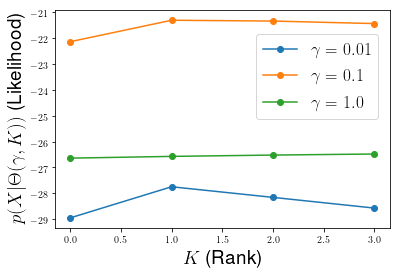

In [14]:
component_arr = np.arange(4) + 1
gamma_arr = np.array([0.01, 0.1, 1])

fig = plt.figure()
for gamma in gamma_arr:
    values = []
    for n_components in component_arr:
        cmd = './build/rank_estimation X.txt {} {}'.format(n_components, gamma)
        marginal = subprocess.check_output(cmd, shell=True).decode('utf-8')
        marginal_float = float(marginal)
        values.append(marginal_float)
    
    plt.plot(values, label=r'$\gamma = {}$'.format(gamma), marker='o')
    
plt.legend(fontsize='xx-large', loc=(0.6, 0.5))
plt.xlabel('$K$ (Rank)', fontsize=19)
plt.ylabel('$p(X|\Theta(\gamma, K))$ (Likelihood)', fontsize=19);
fig.savefig('figure/rank_estimation.eps', format='eps', bbox_inches='tight')